In [1]:
%%capture
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!bash Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

## **HW1**

### **“Where Do We Come From? What Are We? Where Are We Going?”.**

**Steps:**

1. Construct an evolutionary tree based on human mtDNA data:

    1) Alignment using MAFFT (or MUSCLE, CLUSTAL W, prank etc)  
    2) Tree reconstruction using IQTree (or FastTree, MEGA etc)
2. Estimate the age of mitochondrial Eve.
3. Root the tree (add Neanderthal and Denisovan samples as outgroup)
4. Tree visualization using UGENE (or MEGA, Python, R etc)
5. (optional). Place a specific human sample on the resulting tree.

Data:
* Human mtDNA data *([click here for data](https://figshare.com/ndownloader/files/30768763))*

Data outgroup:

* Neanderthal samples *([click here for data](https://figshare.com/ndownloader/files/30768766))*

* Denisovan samples *([click here for data](https://figshare.com/ndownloader/files/30768775))*




### **0. Making merged fasta file**

Перед выравниманием все последовательности нужно **обьединить** в один файл.

1. Сначала нужно извлечь файлы из архива Human.zip
2. Обьеденить в файл merged.fasta.

In [2]:
!unzip /content/Human.zip -d /content/input_fasta/

Archive:  /content/Human.zip
   creating: /content/input_fasta/Human/
  inflating: /content/input_fasta/Human/A2f1a Native American.fasta  
   creating: /content/input_fasta/__MACOSX/
   creating: /content/input_fasta/__MACOSX/Human/
  inflating: /content/input_fasta/__MACOSX/Human/._A2f1a Native American.fasta  
  inflating: /content/input_fasta/Human/A4-A200G Chinese.fasta  
  inflating: /content/input_fasta/__MACOSX/Human/._A4-A200G Chinese.fasta  
  inflating: /content/input_fasta/Human/B2 Argentinian.fasta  
  inflating: /content/input_fasta/__MACOSX/Human/._B2 Argentinian.fasta  
  inflating: /content/input_fasta/Human/B4d1 Chinese.fasta  
  inflating: /content/input_fasta/__MACOSX/Human/._B4d1 Chinese.fasta  
  inflating: /content/input_fasta/Human/C1d3 Uruguayan.fasta  
  inflating: /content/input_fasta/__MACOSX/Human/._C1d3 Uruguayan.fasta  
  inflating: /content/input_fasta/Human/C4a1 Turkish.fasta  
  inflating: /content/input_fasta/__MACOSX/Human/._C4a1 Turkish.fasta  
  in

In [3]:
!cat /content/input_fasta/Human/*.fasta > /content/merged.fasta

### **1. Multiple alignment**

Для множественного выравнимания используем MAFFT.

In [4]:
!conda create -n mafft

Channels:
 - defaults
Platform: linux-64
Solving environment: - done

## Package Plan ##

  environment location: /usr/local/envs/mafft



Proceed ([y]/n)? y

Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done
#
# To activate this environment, use
#
#     $ conda activate mafft
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [5]:
!source activate mafft && conda install mafft -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local/envs/mafft

  added / updated specs:
    - mafft


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    gawk-5.3.1                 |       hcd3d067_0         1.1 MB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    libasprintf-0.22.5         |       he8f35ee_3          42 KB  conda-forge
    libgcc-14.1.0              |       h77fa898_1         827 KB  conda-forge
    libgcc-ng-14.1.0           |       h69a702a_1          51 KB  conda-forge
    libgettextpo-0.22.5        |       he02047a_3         167 KB  conda-forge
    libgomp-14.1.0     

In [6]:
!source activate mafft && mafft --help

------------------------------------------------------------------------------
  MAFFT v7.526 (2024/Apr/26)
  https://mafft.cbrc.jp/alignment/software/
  MBE 30:772-780 (2013), NAR 30:3059-3066 (2002)
------------------------------------------------------------------------------
High speed:
  % mafft in > out
  % mafft --retree 1 in > out (fast)

High accuracy (for <~200 sequences x <~2,000 aa/nt):
  % mafft --maxiterate 1000 --localpair  in > out (% linsi in > out is also ok)
  % mafft --maxiterate 1000 --genafpair  in > out (% einsi in > out)
  % mafft --maxiterate 1000 --globalpair in > out (% ginsi in > out)

If unsure which option to use:
  % mafft --auto in > out

--op # :         Gap opening penalty, default: 1.53
--ep # :         Offset (works like gap extension penalty), default: 0.0
--maxiterate # : Maximum number of iterative refinement, default: 0
--clustalout :   Output: clustal format, default: fasta
--reorder :      Outorder: aligned, default: input order
--quiet :      

In [7]:
!source activate mafft && mafft --auto /content/merged.fasta > /content/aligned.fasta

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 10 ambiguous characters.
    1 / 45
done.

Constructing a UPGMA tree (efffree=0) ... 
   40 / 45
done.

Progressive alignment 1/2... 
STEP    37 / 44  f
Reallocating..done. *alloclen = 34158
STEP    44 / 44  f
done.

Making a distance matrix from msa.. 
    0 / 45
done.

Constructing a UPGMA tree (efffree=1) ... 
   40 / 45
done.

Progressive alignment 2/2... 
STEP    34 / 44  f
Reallocating..done. *alloclen = 34158
STEP    44 / 44  f
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' 

In [8]:
!head /content/aligned.fasta

>JQ247408.1 Homo sapiens haplogroup A2f1a mitochondrion, complete genome
gatcacaggtctatcaccctattaaccactcacgggagctctccatgcatttggtatttt
cgtttggggggtgtgcacgcgatagcattgcgagacgctggagccggagcaccctatgtc
gcagtatctgtctttgattcctgccccatcctgttatttatcgcacctacgttcaatatt
acaggcgaacatacttactaaagtgtgttaattaattaatgcttgtaggacatagtaata
acaattgaatgtctgcacagccgctttccacacagacatcataacaaaaaatttccacca
aa--ccccccctccccccgcttctggccacagcacttaaacacatctctgccaaacccca
aaaacaaagaaccctaacaccagcctaaccagatttcaaattttatcttttggcggtatg
cacttttaacagtcaccccccaactaacacatta-ttttcccctcccactcccatactac
taatctcatcaatacaacccccgcccatcctacccag------cacacacaccgctgcta


### **2. Tree reconstruction**

Different platforms and programs can be used to build the tree:
a) Online phylogenetic platform http://www.phylogeny.fr/

b) Online version of IQ-tree software - http://iqtree.cibiv.univie.ac.at/.

c) MEGA - GUI, all platforms - https://www.megasoftware.net/.

d) Any other tool of your choice. For a command line approach, I suggest FastTree (available via conda)

> It's important not to forget bootstrap support values - a measure of the reliability of the nodes on our tree.

I will use IQ-tree:

In [9]:
!conda create -n iqtree

Channels:
 - defaults
Platform: linux-64
Solving environment: \ done

## Package Plan ##

  environment location: /usr/local/envs/iqtree



Proceed ([y]/n)? y

Preparing transaction: / done
Verifying transaction: \ done
Executing transaction: / done
#
# To activate this environment, use
#
#     $ conda activate iqtree
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [10]:
!source activate iqtree && conda install iqtree -c conda-forge -c bioconda

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local/envs/iqtree

  added / updated specs:
    - iqtree


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    iqtree-2.3.6               |       hdbdd923_0         4.0 MB  bioconda
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will be INSTALLED:

  _libgcc_mutex      conda-forge/linux-64::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex      conda-forge/linux-64::_openmp_mutex-4.5-2_gnu 
  iqtree             bioconda/linux-64::iqtree-2.3.6-hdbdd923_0 
  libgcc             conda-forge/linux-64::libgcc-14.1.0-h77fa898_1 
  libgcc-ng          conda-forge/linux-64::libgcc-ng-14.1.0-h69a702a_1 
  libgomp            conda-forge/linux-64::l

In [11]:
!source activate iqtree && iqtree -h

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Usage: iqtree [-s ALIGNMENT] [-p PARTITION] [-m MODEL] [-t TREE] ...

GENERAL OPTIONS:
  -h, --help           Print (more) help usages
  -s FILE[,...,FILE]   PHYLIP/FASTA/NEXUS/CLUSTAL/MSF alignment file(s)
  -s DIR               Directory of alignment files
  --seqtype STRING     BIN, DNA, AA, NT2AA, CODON, MORPH (default: auto-detect)
  -t FILE|PARS|RAND    Starting tree (default: 99 parsimony and BIONJ)
  -o TAX[,...,TAX]     Outgroup taxon (list) for writing .treefile
  --prefix STRING      Prefix for all output files (default: aln/partition)
  --seed NUM           Random seed number, normally used for debugging purpose
  --safe               Safe likelihood kernel to avoid numerical underflow
  --mem NUM[G|M|%]     Maximal RAM usage in GB | MB | %
  --runs NUM           Nu

In [12]:
!source activate iqtree && iqtree -s /content/aligned.fasta -m TEST -bb 1000 -nt AUTO

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    1b9ddc78c06f (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/aligned.fasta -m TEST -bb 1000 -nt AUTO
Seed:    702900 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Sep 25 20:53:17 2024
Kernel:  AVX+FMA - auto-detect threads (2 CPU cores detected)

Reading alignment file /content/aligned.fasta ... Fasta format detected
Reading fasta file: done in 0.0128984 secs using 84.53% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 45 sequences with 16583 columns, 357 distinct patterns
195 parsimony-informative, 349 singleton sites, 16039 constant sites
            Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 9.9606e-05 secs using 37.15% CPU
   1  JQ247408.1    0.10%    passed     99.93%
   2  KX459697.1    0.10%  

In [13]:
!ls /content/

aligned.fasta	       aligned.fasta.log	 Denisova.zip			    Neanderthal.zip
aligned.fasta.bionj    aligned.fasta.mldist	 Human.zip			    sample_data
aligned.fasta.ckp.gz   aligned.fasta.model.gz	 input_fasta
aligned.fasta.contree  aligned.fasta.splits.nex  merged.fasta
aligned.fasta.iqtree   aligned.fasta.treefile	 Miniconda3-latest-Linux-x86_64.sh


Основные выходные файлы:

1) **aligned.fasta.treefile** — это файл с деревом в формате Newick. Этот файл содержит само филогенетическое дерево, которое ты можешь использовать для визуализации.

2) **aligned.fasta.iqtree** — это файл с результатами анализа (включает информацию о модели, Bootstrap-поддержке и др.).

3) **aligned.fasta.log** — лог-файл с деталями выполнения команды.


Из результатов: **"Best-fit model: TN+F+I+G4 chosen according to BIC"**



To see the resulting tree, you can use several sites for visualization:
- iTOL (Interactive Tree of Life): A very handy tool for downloading and visualizing trees.
- FigTree: A simple program for visualizing trees on a local computer.

Using iTOL, we visualized such a tree:

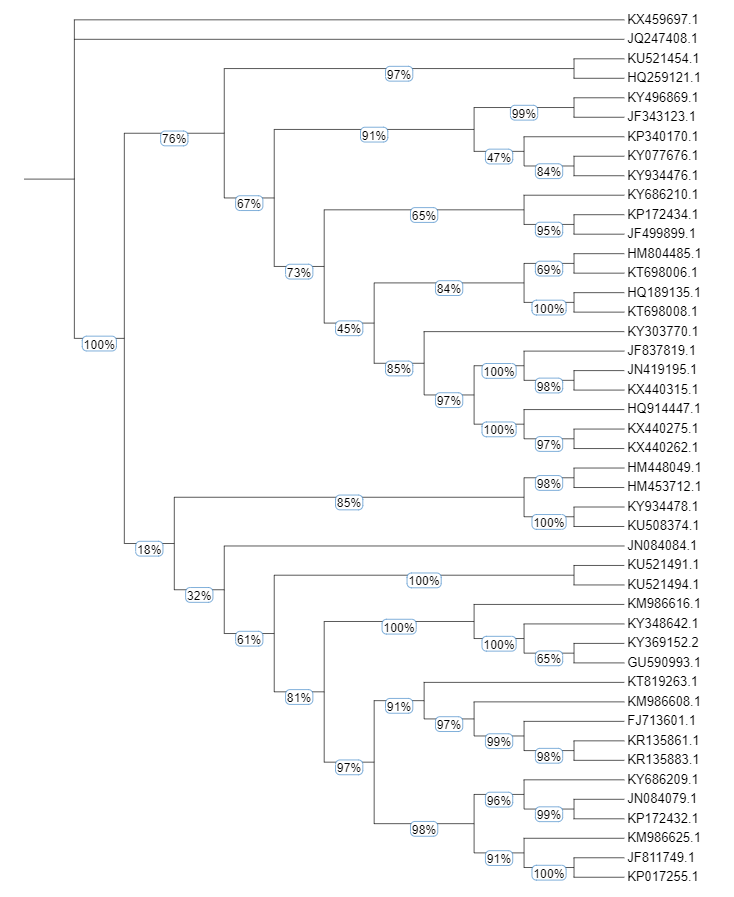

### **3. Root the tree**

- We root the tree by adding five Neanderthal samples and three Denisovan samples.

**3.1. Merge the outgroup**
- we unzipped the files and merged them like we did in the beginning.

In [14]:
# Разархивирование файлов
!unzip /content/Denisova.zip -d /content/denisovan_samples/
!unzip /content/Neanderthal.zip -d /content/neanderthal_samples/

Archive:  /content/Denisova.zip
   creating: /content/denisovan_samples/Denisova/
  inflating: /content/denisovan_samples/Denisova/FN673705 Denisova.fasta  
   creating: /content/denisovan_samples/__MACOSX/
   creating: /content/denisovan_samples/__MACOSX/Denisova/
  inflating: /content/denisovan_samples/__MACOSX/Denisova/._FN673705 Denisova.fasta  
  inflating: /content/denisovan_samples/Denisova/FR695060 Denisova.fasta  
  inflating: /content/denisovan_samples/__MACOSX/Denisova/._FR695060 Denisova.fasta  
  inflating: /content/denisovan_samples/Denisova/KT780370 Denisova.fasta  
  inflating: /content/denisovan_samples/__MACOSX/Denisova/._KT780370 Denisova.fasta  
Archive:  /content/Neanderthal.zip
   creating: /content/neanderthal_samples/Neanderthal/
  inflating: /content/neanderthal_samples/Neanderthal/GoyetQ305-4 Neanderthal.fasta  
   creating: /content/neanderthal_samples/__MACOSX/
   creating: /content/neanderthal_samples/__MACOSX/Neanderthal/
  inflating: /content/neanderthal_

In [19]:
# Объединение всех файлов в один
!cat /content/denisovan_samples/Denisova/*.fasta /content/neanderthal_samples/Neanderthal/*.fasta > /content/merged_outgroup.fasta

**3.2. Add outgroup to our alignment**

We are not going to redo it comletely, just add it to what we already have. We can do it with `--add` parameter in MAFFT.




In [20]:
# Выравнивание с добавлением новой последовательности
!source activate mafft && mafft --add /content/merged_outgroup.fasta --reorder /content/aligned.fasta > /content/extended_alignment.fasta

nadd = 8
nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 27 ambiguous characters.
    1 / 53
done.

Constructing a UPGMA tree (efffree=0) ... 
   50 / 53
done.

Progressive alignment 1/2... 
STEP    52 / 52  f
done.

Making a distance matrix from msa.. 
    0 / 53
done.

Constructing a UPGMA tree (efffree=1) ... 
   50 / 53
done.

Progressive alignment 2/2... 
STEP    52 / 52  f
done.

disttbfast (nuc) Version 7.526
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to

In [21]:
# Размер файла
!du -sh /content/aligned.fasta

748K	/content/aligned.fasta


# **3.3. Reconstruct tree with outgoup**

As we did it with alignment, at this step we are also not going to redo it completely. We will use the best model for the previous tree.

In [24]:
!source activate iqtree && iqtree -s /content/extended_alignment.fasta -g /content/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    1b9ddc78c06f (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/extended_alignment.fasta -g /content/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705,FR695060,KX198087,KX198086,KX198085,KX198084,KX198088,KT780370
Seed:    365855 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Sep 25 21:39:09 2024
Kernel:  AVX+FMA - 1 threads (2 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 2 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /content/extended_alignment.fasta ... Fasta format detected
Reading fasta file: done in 0.0151815 secs using 93.14% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 53 sequences with 16592 columns, 476 di

In [26]:
!grep -E "FR695060|KX198087|KX198086|KX198085|KX198084|KX198088|KT780370" /content/extended_alignment.fasta

>KX198087.1 Homo sapiens neanderthalensis isolate GoyetQ305-4 mitochondrion, complete genome
>KX198086.1 Homo sapiens neanderthalensis isolate GoyetQ305-7 mitochondrion, complete genome
>KX198085.1 Homo sapiens neanderthalensis isolate GoyetQ374a-1 mitochondrion, complete genome
>KX198084.1 Homo sapiens neanderthalensis isolate GoyetQ56-1 mitochondrion, complete genome
>KX198088.1 Homo sapiens neanderthalensis isolate GoyetQ57-2 mitochondrion, complete genome
>FR695060.1 Homo sp. Altai complete mitochondrial genome, isolate Denisova molar
>KT780370.1 Homo sapiens ssp. Denisova isolate Denisova8 mitochondrion, complete genome


- Переделываем команду, добавив к гаплогруппе идентификатор ".1", возможно, это из-за того, что переделывала команды выше.

In [29]:
!source activate iqtree && iqtree -s /content/extended_alignment.fasta -g /content/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705.1,FR695060.1,KX198087.1,KX198086.1,KX198085.1,KX198084.1,KX198088.1

IQ-TREE multicore version 2.3.6 for Linux x86 64-bit built Aug  4 2024
Developed by Bui Quang Minh, Nguyen Lam Tung, Olga Chernomor, Heiko Schmidt,
Dominik Schrempf, Michael Woodhams, Ly Trong Nhan, Thomas Wong

Host:    1b9ddc78c06f (AVX2, FMA3, 12 GB RAM)
Command: iqtree -s /content/extended_alignment.fasta -g /content/aligned.fasta.treefile -m TN+F+I+G4 -o FN673705.1,FR695060.1,KX198087.1,KX198086.1,KX198085.1,KX198084.1,KX198088.1
Seed:    343071 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Wed Sep 25 21:47:04 2024
Kernel:  AVX+FMA - 1 threads (2 CPU cores detected)

HINT: Use -nt option to specify number of threads because your CPU has 2 cores!
HINT: -nt AUTO will automatically determine the best number of threads to use.

Reading alignment file /content/extended_alignment.fasta ... Fasta format detected
Reading fasta file: done in 0.0151772 secs using 94.35% CPU
Alignment most likely contains DNA/RNA sequences
Alignment has 53 sequences with 16592 columns, 4

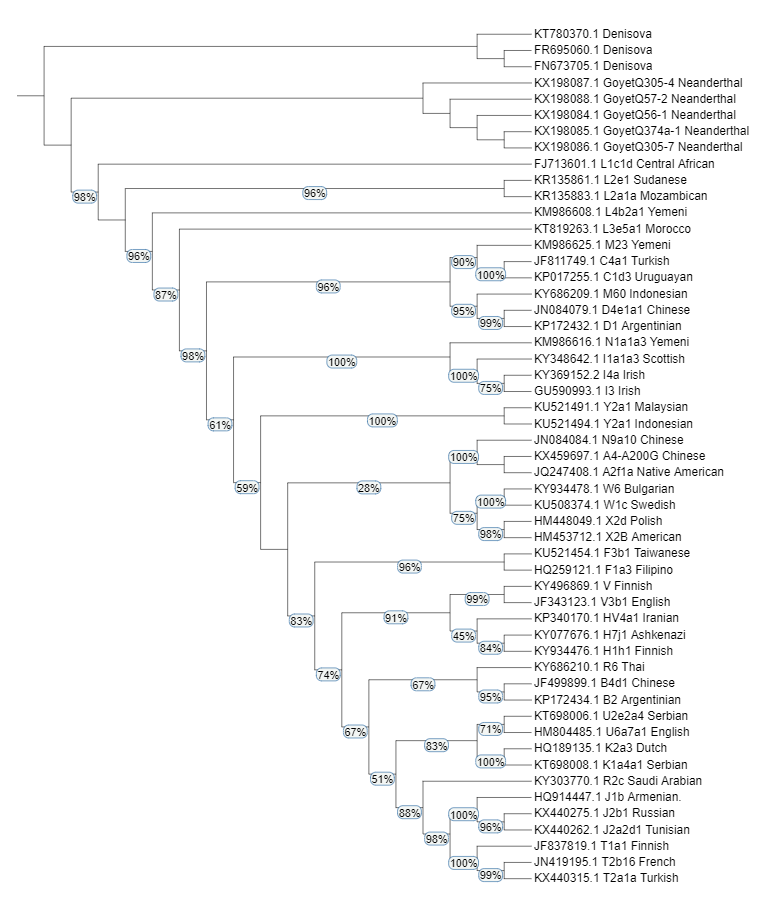